In [ ]:
# Start writing code here...

In [ ]:
!pip install --upgrade pip
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 kB 80.2 MB/s eta 0:00:00


In [ ]:
fromfromfromfromfromfromfromfromfromfromfromfrom unidecode import unidecode
import joblib
from pathlib import Path
import pandas as pd
import numpy as np
from orjson import dumps
from collections import UserString
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from skopt import BayesSearchCV
from skopt.space import Categorical
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier
from skopt.space import Real, Integer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer, MaxAbsScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

In [ ]:
# defini uma nova variavel chamada df_merged3(novo dataframe), 
# carregando os dados do dataframe da sessao anterior

df_merged = joblib.load('df_merged4.joblib')
df_merged

EXECUTIVO                \
                                                       2019                 
                                 total_despesas_com_pessoal rcl_acumulado   
ACORIZAL                                       5.919371e+06  1.758719e+07   
AGUA BOA                                       4.518862e+07  9.314904e+07   
ALTA FLORESTA                                  7.971719e+07  1.343943e+08   
ALTO ARAGUAIA                                  3.634683e+07  6.995880e+07   
ALTO BOA VISTA                                 1.208237e+07  2.421290e+07   
...                                                     ...           ...   
VALE DE SAO DOMINGOS                           7.327554e+06  1.692502e+07   
VARZEA GRANDE                                  2.865791e+08  6.252385e+08   
VERA                                           1.780590e+07  3.905191e+07   
VILA BELA DA SANTISSIMA TRINDADE               2.943355e+07  6.133895e+07   
VILA RICA                                      3.001397e+07  5.982912e+07   

                                                                  LEGISLATIVO  \
                                                                         2019   
                                 aplicado limite_legal alerta_90     despesas   
ACORIZAL                            33.66         54.0       NÃO    438326.55   
AGUA BOA                            48.51         54.0       NÃO   2057041.05   
ALTA FLORESTA                       59.32         54.0       SIM   3705291.16   
ALTO ARAGUAIA                       51.95         54.0       SIM   2441706.44   
ALTO BOA VISTA                      49.90         54.0       SIM    681120.23   
...                                   ...          ...       ...          ...   
VALE DE SAO DOMINGOS                43.29         54.0       NÃO    531656.25   
VARZEA GRANDE                       45.84         54.0       NÃO  11928206.73   
VERA                                45.60         54.0       NÃO    945641.27   
VILA BELA DA SANTISSIMA TRINDADE    47.99         54.0       NÃO   1591984.03   
VILA RICA                           50.17         54.0       SIM   1631881.77   

                                                                      \
                                                                       
                                 rcl_acumulado aplicado limite_legal   
ACORIZAL                          1.758719e+07     2.49          6.0   
AGUA BOA                          9.314904e+07     2.21          6.0   
ALTA FLORESTA                     1.343943e+08     2.76          6.0   
ALTO ARAGUAIA                     6.995880e+07     3.49          6.0   
ALTO BOA VISTA                    2.421290e+07     2.81          6.0   
...                                        ...      ...          ...   
VALE DE SAO DOMINGOS              1.692502e+07     3.14          6.0   
VARZEA GRANDE                     6.252385e+08     1.91          6.0   
VERA                              3.905191e+07     2.42          6.0   
VILA BELA DA SANTISSIMA TRINDADE  6.133895e+07     2.60          6.0   
VILA RICA                         5.982912e+07     2.73          6.0   

                                            ...  \
                                            ...   
                                 alerta_90  ...   
ACORIZAL                               NÃO  ...   
AGUA BOA                               NÃO  ...   
ALTA FLORESTA                          NÃO  ...   
ALTO ARAGUAIA                          NÃO  ...   
ALTO BOA VISTA                         NÃO  ...   
...                                    ...  ...   
VALE DE SAO DOMINGOS                   NÃO  ...   
VARZEA GRANDE                          NÃO  ...   
VERA                                   NÃO  ...   
VILA BELA DA SANTISSIMA TRINDADE       NÃO  ...   
VILA RICA                              NÃO  ...   

                                                                                    ibge  \
                    

A previsão será feita com base no X, que são as variáveis independentes 
O ```y``` é a variável dependente, que representa se a LRF foi cumprida ou não para cada município em 2022
O ```y``` foi definido como uma variável binária, onde 1 indica que a LRF foi cumprida e 0 indica que não foi cumprida
A definição de cumprimento é baseada na coluna "aplicado" do EXECUTIVO e LEGISLATIVO em que deve ser menor ou igual a 54% e 6% respectivamente
A previsão será feita com base no modelo que será treinado usando os dados disponíveis
O modelo estimará os valores da variável dependente para cada município em 2022
Os resultados das previsões serão comparados com os valores reais da variável dependente (A variável dependente gerada que diz se cumrpiu ou não a LRF) para avaliar o desempenho do modelo

In [ ]:
# x = variaveis independentes : são todas menos as colunas de "aplicado", 
# que é onde sabemos quem cumpriu ou não a LRF
# serão utilizadas na previsão com base em todos os dados

X=  df_merged.drop([('EXECUTIVO', '2022','aplicado'), ('LEGISLATIVO', '2022','aplicado')], axis=1)
X

EXECUTIVO                \
                                                       2019                 
                                 total_despesas_com_pessoal rcl_acumulado   
ACORIZAL                                       5.919371e+06  1.758719e+07   
AGUA BOA                                       4.518862e+07  9.314904e+07   
ALTA FLORESTA                                  7.971719e+07  1.343943e+08   
ALTO ARAGUAIA                                  3.634683e+07  6.995880e+07   
ALTO BOA VISTA                                 1.208237e+07  2.421290e+07   
...                                                     ...           ...   
VALE DE SAO DOMINGOS                           7.327554e+06  1.692502e+07   
VARZEA GRANDE                                  2.865791e+08  6.252385e+08   
VERA                                           1.780590e+07  3.905191e+07   
VILA BELA DA SANTISSIMA TRINDADE               2.943355e+07  6.133895e+07   
VILA RICA                                      3.001397e+07  5.982912e+07   

                                                                  LEGISLATIVO  \
                                                                         2019   
                                 aplicado limite_legal alerta_90     despesas   
ACORIZAL                            33.66         54.0       NÃO    438326.55   
AGUA BOA                            48.51         54.0       NÃO   2057041.05   
ALTA FLORESTA                       59.32         54.0       SIM   3705291.16   
ALTO ARAGUAIA                       51.95         54.0       SIM   2441706.44   
ALTO BOA VISTA                      49.90         54.0       SIM    681120.23   
...                                   ...          ...       ...          ...   
VALE DE SAO DOMINGOS                43.29         54.0       NÃO    531656.25   
VARZEA GRANDE                       45.84         54.0       NÃO  11928206.73   
VERA                                45.60         54.0       NÃO    945641.27   
VILA BELA DA SANTISSIMA TRINDADE    47.99         54.0       NÃO   1591984.03   
VILA RICA                           50.17         54.0       SIM   1631881.77   

                                                                      \
                                                                       
                                 rcl_acumulado aplicado limite_legal   
ACORIZAL                          1.758719e+07     2.49          6.0   
AGUA BOA                          9.314904e+07     2.21          6.0   
ALTA FLORESTA                     1.343943e+08     2.76          6.0   
ALTO ARAGUAIA                     6.995880e+07     3.49          6.0   
ALTO BOA VISTA                    2.421290e+07     2.81          6.0   
...                                        ...      ...          ...   
VALE DE SAO DOMINGOS              1.692502e+07     3.14          6.0   
VARZEA GRANDE                     6.252385e+08     1.91          6.0   
VERA                              3.905191e+07     2.42          6.0   
VILA BELA DA SANTISSIMA TRINDADE  6.133895e+07     2.60          6.0   
VILA RICA                         5.982912e+07     2.73          6.0   

                                            ...  \
                                            ...   
                                 alerta_90  ...   
ACORIZAL                               NÃO  ...   
AGUA BOA                               NÃO  ...   
ALTA FLORESTA                          NÃO  ...   
ALTO ARAGUAIA                          NÃO  ...   
ALTO BOA VISTA                         NÃO  ...   
...                                    ...  ...   
VALE DE SAO DOMINGOS                   NÃO  ...   
VARZEA GRANDE                          NÃO  ...   
VERA                                   NÃO  ...   
VILA BELA DA SANTISSIMA TRINDADE       NÃO  ...   
VILA RICA                              NÃO  ...   

                                                                                    ibge  \
                    

In [ ]:
# y = variaveis dependentes : a coluna de "aplicado" é utilizado como critério de cumprimento
# representa se o município cumpriu ou não a LRF em 2022
# será "1" quem cumpriu a LRF : abaixo ou igual a 54 % para executivo e abaixo ou igual a 6 % para legislativo
# será "0" quem não cumpriu a LRF
# caso tenha valor ausente será Nan

y = np.where(
    df_merged[('EXECUTIVO', '2022','aplicado')].isna() | df_merged[('LEGISLATIVO', '2022','aplicado')].isna(),
    np.nan,
    (df_merged[('EXECUTIVO', '2022','aplicado')]<=54) & (df_merged[('LEGISLATIVO', '2022','aplicado')]<=6)
)
y

array([nan,  1.,  0.,  0.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1., nan,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., nan,  1., nan,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., nan,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., nan,  1.,  1., nan,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., nan,  1.,  1., nan,  1.,  1.,  1.,  1.,
        1., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., nan,  1.,  1.,  0.,  1.,  1.,  1.,  1., nan,  1.,
        1., nan, nan,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1., nan,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan])

In [ ]:
# verificando quantidade de nulos
np.isnan(y).sum()

19

In [ ]:
# usando train_test_split para dividir o conjunto de dados em treino e teste
# aqui estou filtrando de X os Nan de Y( valores nao ausentes)


# X_filtrado : colunas de X onde os valores de y são não nulos 
# y_filtrado : colunas não nulas de y

# aqui nao tem valores ausentes, essa filtragem é importante para que o modelo não seja testado
# com dados desconhecidos na variável dependente

nan = np.isnan(y)  
nao_nan = ~nan
X_filtrado = X[nao_nan]
y_filtrado = y[nao_nan]
y_filtrado


array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1.])

In [ ]:

# separando 25% para teste

# aqui passo o X_filtrado, y_filtrado
# defini uma amostra de 35 municipios(25% do total do dataset) para teste e o resto será usado para treino
# random_state=42 para garantir que divisão entre os conjuntos seja sempre a mesma
# shuffle=True para embaralhar aleatoriamente os dados antes de dividir em conjuntos de treino e teste


X_train_filtrado, X_test, y_train_filtrado, y_test  = train_test_split(X_filtrado, y_filtrado, test_size=35, stratify=y_filtrado,  random_state=42, shuffle=True)

In [ ]:
# criei uma variável "y_nan" que armazena os valores de y onde há valores ausentes (NaN)
# e x_nan onde há valores de Y NaN
# separando os 19 municípios com nan em Y para treino

X_nan = X[nan]  
y_nan = y[nan]
y_nan

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])

In [ ]:
print(type(X_filtrado))  # X_filtrado é um dataframe
X_filtrado

<class 'pandas.core.frame.DataFrame'>


EXECUTIVO                         \
                                           2019                          
                     total_despesas_com_pessoal rcl_acumulado aplicado   
AGUA BOA                           4.518862e+07  9.314904e+07    48.51   
ALTA FLORESTA                      7.971719e+07  1.343943e+08    59.32   
ALTO ARAGUAIA                      3.634683e+07  6.995880e+07    51.95   
ALTO BOA VISTA                     1.208237e+07  2.421290e+07    49.90   
ALTO GARCAS                        2.171927e+07  4.309046e+07    50.40   
...                                         ...           ...      ...   
TORIXOREU                          7.520549e+06  1.995611e+07    37.69   
UNIAO DO SUL                       8.183527e+06  2.013308e+07    40.65   
VALE DE SAO DOMINGOS               7.327554e+06  1.692502e+07    43.29   
VARZEA GRANDE                      2.865791e+08  6.252385e+08    45.84   
VERA                               1.780590e+07  3.905191e+07    45.60   

                                             LEGISLATIVO                \
                                                    2019                 
                     limite_legal alerta_90     despesas rcl_acumulado   
AGUA BOA                     54.0       NÃO   2057041.05  9.314904e+07   
ALTA FLORESTA                54.0       SIM   3705291.16  1.343943e+08   
ALTO ARAGUAIA                54.0       SIM   2441706.44  6.995880e+07   
ALTO BOA VISTA               54.0       SIM    681120.23  2.421290e+07   
ALTO GARCAS                  54.0       SIM   1201422.21  4.309046e+07   
...                           ...       ...          ...           ...   
TORIXOREU                    54.0       NÃO    494477.63  1.995611e+07   
UNIAO DO SUL                 54.0       NÃO    444044.67  2.013308e+07   
VALE DE SAO DOMINGOS         54.0       NÃO    531656.25  1.692502e+07   
VARZEA GRANDE                54.0       NÃO  11928206.73  6.252385e+08   
VERA                         54.0       NÃO    945641.27  3.905191e+07   

                                                      ...  \
                                                      ...   
                     aplicado limite_legal alerta_90  ...   
AGUA BOA                 2.21          6.0       NÃO  ...   
ALTA FLORESTA            2.76          6.0       NÃO  ...   
ALTO ARAGUAIA            3.49          6.0       NÃO  ...   
ALTO BOA VISTA           2.81          6.0       NÃO  ...   
ALTO GARCAS              2.79          6.0       NÃO  ...   
...                       ...          ...       ...  ...   
TORIXOREU                2.48          6.0       NÃO  ...   
UNIAO DO SUL             2.21          6.0       NÃO  ...   
VALE DE SAO DOMINGOS     3.14          6.0       NÃO  ...   
VARZEA GRANDE            1.91          6.0       NÃO  ...   
VERA                     2.42          6.0       NÃO  ...   

                                                                        ibge  \
                                                                        2020   
                     IDEB – Anos finais do ensino fundamental (Rede pública)   
AGUA BOA                                                           48.0        
ALTA FLORESTA                                                       5.0        
ALTO ARAGUAIA                                                      51.0        
ALTO BOA VISTA                                                     48.0        
ALTO GARCAS                                                        46.0        
...                                                                 ...        
TORIXOREU                                                          51.0        
UNIAO DO SUL                                                        NaN        
VALE DE SAO DOMINGOS                                                NaN        
VARZEA GRANDE                                                      47.0        
VERA                                                               47

In [ ]:
print(type(y_train_filtrado))  # é <class 'numpy.ndarray'>
y_train_filtrado

<class 'numpy.ndarray'>


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1.])

In [ ]:
# juntando os dados de treino :
# será X_train_filtrado e y_train_filtrado onde não há valores ausentes em Y e +
# X_nan e y_nan onde há valores ausentes em Y
 
y_train = np.concatenate([y_train_filtrado, y_nan], axis =0)
X_train = X_train_filtrado.append(X_nan)

print(type(X_train))
X_train


<class 'pandas.core.frame.DataFrame'>


EXECUTIVO                \
                                                       2019                 
                                 total_despesas_com_pessoal rcl_acumulado   
PONTES E LACERDA                               4.942175e+07  1.230947e+08   
SANTA RITA DO TRIVELATO                        1.119842e+07  2.905566e+07   
VARZEA GRANDE                                  2.865791e+08  6.252385e+08   
NOVO SAO JOAQUIM                               1.526077e+07  3.476940e+07   
TAPURAH                                        2.804922e+07  5.509213e+07   
...                                                     ...           ...   
SAO FELIX DO ARAGUAIA                          2.383463e+07  5.196478e+07   
SAO JOSE DOS QUATRO MARCOS                     2.272816e+07  4.581638e+07   
TABAPORA                                       1.709128e+07  4.166218e+07   
VILA BELA DA SANTISSIMA TRINDADE               2.943355e+07  6.133895e+07   
VILA RICA                                      3.001397e+07  5.982912e+07   

                                                                  LEGISLATIVO  \
                                                                         2019   
                                 aplicado limite_legal alerta_90     despesas   
PONTES E LACERDA                    40.15         54.0       NÃO   3251133.74   
SANTA RITA DO TRIVELATO             38.54         54.0       NÃO    928348.00   
VARZEA GRANDE                       45.84         54.0       NÃO  11928206.73   
NOVO SAO JOAQUIM                    43.89         54.0       NÃO    976872.48   
TAPURAH                             50.91         54.0       SIM   1284772.92   
...                                   ...          ...       ...          ...   
SAO FELIX DO ARAGUAIA               45.87         54.0       NÃO   1196662.99   
SAO JOSE DOS QUATRO MARCOS          49.61         54.0       SIM   1272066.94   
TABAPORA                            41.02         54.0       NÃO    954121.02   
VILA BELA DA SANTISSIMA TRINDADE    47.99         54.0       NÃO   1591984.03   
VILA RICA                           50.17         54.0       SIM   1631881.77   

                                                                      \
                                                                       
                                 rcl_acumulado aplicado limite_legal   
PONTES E LACERDA                  1.230947e+08     2.64          6.0   
SANTA RITA DO TRIVELATO           2.905566e+07     3.20          6.0   
VARZEA GRANDE                     6.252385e+08     1.91          6.0   
NOVO SAO JOAQUIM                  3.476940e+07     2.81          6.0   
TAPURAH                           5.509213e+07     2.33          6.0   
...                                        ...      ...          ...   
SAO FELIX DO ARAGUAIA             5.196478e+07     2.30          6.0   
SAO JOSE DOS QUATRO MARCOS        4.581638e+07     2.78          6.0   
TABAPORA                          4.166218e+07     2.29          6.0   
VILA BELA DA SANTISSIMA TRINDADE  6.133895e+07     2.60          6.0   
VILA RICA                         5.982912e+07     2.73          6.0   

                                            ...  \
                                            ...   
                                 alerta_90  ...   
PONTES E LACERDA                       NÃO  ...   
SANTA RITA DO TRIVELATO                NÃO  ...   
VARZEA GRANDE                          NÃO  ...   
NOVO SAO JOAQUIM                       NÃO  ...   
TAPURAH                                NÃO  ...   
...                                    ...  ...   
SAO FELIX DO ARAGUAIA                  NÃO  ...   
SAO JOSE DOS QUATRO MARCOS             NÃO  ...   
TABAPORA                               NÃO  ...   
VILA BELA DA SANTISSIMA TRINDADE       NÃO  ...   
VILA RICA                              NÃO  ...   

                                                                                    ibge  \
                    

In [ ]:
# verificando número de variaveis
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((106, 187), (106,), (35, 187), (35,))

In [ ]:
# embaralhando X e Y de treino
# para evitar que haja alguma ordem específica que possa influenciar negativamente no treinamento do modelo

np.random.seed(42)  # gerando números aleatorios
id = np.arange(len(X_train)) # sequência de números correspondente a ordem original dos dados de treino
np.random.shuffle(id) # embaralhando aleatoriamente
X_train = X_train.iloc[id]
y_train = y_train[id]

In [ ]:
# feita essa separação de variaveis dependentes e independentes e teste e treino, 
# as proximas etapas serão da montagem do pipeline:

In [ ]:
# 1 : 
# para deixar tudo na mesma escala:
#  codificar as colunas de texto em números para o modelo e normalizar os dados numéricos, para isso:

# usei o ColumnSelector para selecionar as colunas do tipo texto que serão encodadas e do tipo number que serão normalizadas
# apliquei um ColumnTransformer para aplicar o OneHotEncoder nas colunas textuais e o MinMaxScaler para as colunas numéricas

In [ ]:
# 2 :
# fazer a imputação nos valores ausentes 
# ver uma forma de preencher dados faltantes
# https://scikit-learn.org/stable/modules/impute.html#impute
# usar o BayesSearchCV para ver qual o melhor método


In [ ]:
# usei o Sklearn para aplicação do modelo
# pipeline que consiste em uma sequência de transformações de dados para preparar os dados 
#  Colum Transformer: transformação dos dados categóricos 
#  imputer: foram testadas técnicas de imputação para preencher valores faltantes nos dados
#  scale: foram testadas técnicas de normalização para escalar os dados
#  dimension_reduction: Foram testadas técnicas de redução da dimensionalidade,


# Selecionando colunas categóricas
category_selector = make_column_selector(dtype_include='category')

# Selecionando colunas numéricas
numeric_selector = make_column_selector(dtype_include='number')

# Aplicando OneHotEncoder nas colunas categóricas
category_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Aplicando a técnica de normalização nas colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('scale', MinMaxScaler())
])

# Criando o ColumnTransformers

column_categoric = ColumnTransformer(transformers=[
    ('category', category_transformer, category_selector)
], remainder='passthrough')


# incluindo o classificador no pipeline

pipe = Pipeline([
    ('column_categoric', column_categoric), 
    ('imputer', SimpleImputer()),
    ('scale', MinMaxScaler()),
    ('dimension_reduction', PCA()),
    ('classifier', SelfTrainingClassifier(RandomForestClassifier()))
])

pipe.get_params()

{'memory': None,
 'steps': [('column_categoric',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('category',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb8b238efa0>)])),
  ('imputer', SimpleImputer()),
  ('scale', MinMaxScaler()),
  ('dimension_reduction', PCA()),
  ('classifier',
   SelfTrainingClassifier(base_estimator=RandomForestClassifier()))],
 'verbose': False,
 'column_categoric': ColumnTransformer(remainder='passthrough',
                   transformers=[('category',
                                  Pipeline(steps=[('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb

In [ ]:
np.nan_to_num(y, nan= -1)

array([-1.,  1.,  0.,  0.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1., -1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  0.,  1.,  1.,  1.,  1., -1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.])

In [ ]:
def supress_parameter(base, **kwargs):
    class SupressParameter(type(base)):
        def __init__(self, *args, **kwargs):
            super().__init__(*args)
            try:
                self._model_params = list(super().get_params().keys())
            except:
                self._model_params = {}
            try:
                super().set_params(**{k: kwargs[v] for k in self._model_params if k in kwargs})
            except:
                pass
        
        def get_params(self, deep=False):
            try:
                return super().get_params(deep=deep)
            except:
                return {}

        def set_params(self, **params):
            return type(self)(**params)

    SupressParameter.__name__ = f"SupressParameter({type(base).__name__})"
    try:
        return SupressParameter(**base.get_params())
    except:
        return SupressParameter(base)
supress_parameter(UserString('a'))

'a'

In [ ]:
# from pickle import loads, dumps
# supress_parameter(RandomForestClassifier(n_estimators=500)).get_params()

In [ ]:
b = 'a'
b.__init__('c')
b

'a'

In [ ]:
# foi necessário definir os valores possíveis para cada parâmetro
# o Bayes Search CV escolhe o melhor modelo com base nos parametros

search_spaces = {
    'scale':Categorical([
        supress_parameter(MinMaxScaler()), 
        supress_parameter(RobustScaler()),
        supress_parameter(StandardScaler()),
        supress_parameter(Normalizer()),
        supress_parameter(MaxAbsScaler()),
        supress_parameter(PowerTransformer())
    ]),

    'scale__feature_range': Real(0, 1),
    'scale__with_centering': Categorical([True, False]),
   'scale__with_scaling': Categorical([True, False]),
    #'scale__quantile_range': Categorical([
    #    (1, 75), 
    #    (1, 90), 
    #    (1, 99), 
    #    (10, 75), 
    #    (10, 90), 
    #    (10, 99), 
    #    (25, 75), 
    #   (25, 90), 
    #    (25, 99)
    #    ]),
    'scale__unit_variance': Categorical([True, False]),
    'scale__with_mean': Categorical([True, False]),
    'scale__norm': Categorical(['l1', 'l2', 'max']),
    'scale__method': Categorical(['yeo-johnson', 'box-cox']),
    'scale__standardize': Categorical([True, False]),

    'imputer':Categorical([
        supress_parameter(SimpleImputer()), 
        supress_parameter(KNNImputer()),
        supress_parameter(IterativeImputer())
    ]),
    
    'imputer__strategy': Categorical(['mean', 'median', 'most_frequent', 'constant']),
    'imputer__fill_value': Real(-100, 100),
    'imputer__add_indicator': Categorical([True, False]),
    'imputer__keep_empty_features': Categorical([True, False]),
    'imputer__kn_neighbors': Integer(1, 100),
    'imputer__weights': Categorical(['uniform', 'distance']),
    'imputer__metric': Categorical(['nan_euclidean']),
    'imputer__sample_posterior': Categorical([True, False]),
    'imputer__max_iter': Integer(1, 100),
    'imputer__tol': Real(-100, 100),
    'imputer__n_nearest_features': Integer(1, 100),
    'imputer__initial_strategy': Categorical(['mean', 'median', 'most_frequent', 'constant']),
    'imputer__imputation_order': Categorical(['ascending', 'descending', 'roman', 'arabic', 'random']),
    'imputer__skip_complete': Categorical([True, False]),
     

    'classifier__base_estimator__n_estimators': Integer(100, 10_000),
    'classifier__base_estimator__criterion': Categorical(['gini', 'entropy', 'log_loss']),
    'classifier__base_estimator__max_depth': Categorical([2 ** i for i in range(15)] + [None]),
    'classifier__base_estimator__min_samples_split': Integer(2, 16),
    'classifier__base_estimator__min_samples_leaf': Integer(1, 16),
    'classifier__base_estimator__min_weight_fraction_leaf': Real(0, .5),
    'classifier__base_estimator__max_features': Categorical(['sqrt', 'log2']),
    'classifier__base_estimator__max_leaf_nodes': Categorical([2 ** i for i in range(1, 15)] + [None]),
    'classifier__base_estimator__min_impurity_decrease' : Real(0, .1),
    'classifier__base_estimator__bootstrap': Categorical([True]),
    'classifier__base_estimator__oob_score' : Categorical([True, False]),
    'classifier__base_estimator__n_jobs' : Categorical([-1]),
    'classifier__base_estimator__warm_start' : Categorical([True, False]),
    'classifier__base_estimator__class_weight': Categorical(['balanced', 'balanced_subsample', None]),  # Isso está certo?
    'classifier__base_estimator__ccp_alpha' : Real(0, .05),
    'classifier__base_estimator__max_samples' : Real(0.05, 1.),

    'classifier__criterion': Categorical(['threshold', 'k_best']),
    'classifier__k_best': Integer(1, 16),
    'classifier__max_iter': Categorical([i for i in range(0, 16)] + [None]),
    'classifier__threshold': Real(0.5, 0.75),

    

    'dimension_reduction': Categorical([
                                        supress_parameter(PCA()), 
                                        supress_parameter(SelectKBest()),
                                    ]),

    'dimension_reduction__n_components': Integer(2, 150),
    'dimension_reduction__whiten': Categorical([True, False]),
    'dimension_reduction__svd_solver': Categorical(['auto', 'full', 'arpack', 'randomized']),
    'dimension_reduction__tol': Real(-100, 100),
    'dimension_reduction__n_oversamples': Integer(0, 100),
    'dimension_reduction__power_iteration_normalizer': Categorical(['auto', 'QR', 'LU', 'none']),
    

    'dimension_reduction__score_func': Categorical(['mutual_info_classif', 'chi2', 'f_classif']),
    'dimension_reduction__k': Integer(2, 150)


}

In [ ]:
# criando o  BayesSearchCV
# foram executadas 150 iterações em que diferentes combinações de hiperparâmetros foram testadas e avaliadas
# dei o fit pra aplicar no conjunto de treino

self_train_opt = BayesSearchCV(
    pipe,
    search_spaces=search_spaces,
    n_iter=150,
    scoring="accuracy",
    n_jobs=1,
    cv=3,
    verbose=2,
    random_state=42,
)

# buscando os melhores parâmetros com o BayesSearchCV

self_train_opt.fit(X_train, np.nan_to_num(y_train, nan=-1))


[CV] END classifier__base_estimator__bootstrap=True, classifier__base_estimator__ccp_alpha=0.02789099109311335, classifier__base_estimator__class_weight=balanced_subsample, classifier__base_estimator__criterion=gini, classifier__base_estimator__max_depth=8, classifier__base_estimator__max_features=sqrt, classifier__base_estimator__max_leaf_nodes=16384, classifier__base_estimator__max_samples=0.5356483222962373, classifier__base_estimator__min_impurity_decrease=0.017632768554644233, classifier__base_estimator__min_samples_leaf=10, classifier__base_estimator__min_samples_split=6, classifier__base_estimator__min_weight_fraction_leaf=0.329771349276854, classifier__base_estimator__n_estimators=2883, classifier__base_estimator__n_jobs=-1, classifier__base_estimator__oob_score=True, classifier__base_estimator__warm_start=True, classifier__criterion=threshold, classifier__k_best=6, classifier__max_iter=15, classifier__threshold=0.691917546724874, dimension_reduction=SupressParameter(SelectKBes

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('column_categoric',
                                         ColumnTransformer(remainder='passthrough',
                                                           transformers=[('category',
                                                                          Pipeline(steps=[('onehot',
                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7fbe49286910>)])),
                                        ('imputer', SimpleImputer()),
                                        ('scale', MinMaxScaler()),
                                        ('dimension...
                             'dimension_reduction__svd_solver': Categorical(categories=('auto', 'full', 'arpack', 'randomized'), prior=None),
                             'dimension_reduction__tol': Real(low=-100, high=100, prior='uniform', transform='normalize'),
                             'dimension_reduction__whiten': Categorical(categories=(True, False), prior=None),
                             'imputer': Categorical(categories=(SupressParameter(SimpleImputer)(), SupressParameter(KNNImputer)(), SupressParameter(IterativeImputer)()), prior=None), ...},
              verbose=2)

In [ ]:
# os melhores estimadores

self_train_opt.best_estimator_

Pipeline(steps=[('column_categoric',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbe419ef2e0>)])),
                ('imputer', SupressParameter(SimpleImputer)()),
                ('scale', SupressParameter(PowerTransformer)()),...
                 SelfTrainingClassifier(base_estimator=RandomForestClassifier(ccp_alpha=0.034534909998840936,
                                                                              class_weight='balanced',
                                                                              max_depth=64,
                                                                              max_features='log2',
                                                                              max_leaf_nodes=512,
                                                                              max_samples=0.5503183470486125,
                                                                              min_impurity_decrease=0.02724117622201245,
                                                                              min_samples_leaf=2,
                                                                              min_samples_split=11,
                                                                              min_weight_fraction_leaf=0.18787783792034668,
                                                                              n_estimators=1268,
                                                                              n_jobs=-1,
                                                                              warm_start=True),
                                        k_best=13,
                                        threshold=0.6464344327357384))])

In [ ]:
# melhor resultado de validação
# o melhor resultado de validação obtido durante a busca de hiperparâmetros foi de 0.9619
# modelo classificou corretamente 96.19% das amostras durante a validação cruzada
self_train_opt.best_score_

0.7735449735449736

In [ ]:
# aqui mostra os melhores parâmetros que foram encontrados para cada etapa do pipeline

self_train_opt.best_params_

OrderedDict([('classifier__base_estimator__bootstrap', True),
             ('classifier__base_estimator__ccp_alpha', 0.034534909998840936),
             ('classifier__base_estimator__class_weight', 'balanced'),
             ('classifier__base_estimator__criterion', 'gini'),
             ('classifier__base_estimator__max_depth', 64),
             ('classifier__base_estimator__max_features', 'log2'),
             ('classifier__base_estimator__max_leaf_nodes', 512),
             ('classifier__base_estimator__max_samples', 0.5503183470486125),
             ('classifier__base_estimator__min_impurity_decrease',
              0.02724117622201245),
             ('classifier__base_estimator__min_samples_leaf', 2),
             ('classifier__base_estimator__min_samples_split', 11),
             ('classifier__base_estimator__min_weight_fraction_leaf',
              0.18787783792034668),
             ('classifier__base_estimator__n_estimators', 1268),
             ('classifier__base_estimator__n_j

In [ ]:
# treinei o modelo utilizando o estimador otimizado 

estimator = clone(self_train_opt.best_estimator_)
estimator.fit(X_train, np.nan_to_num(y_train, nan=-1))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [  2   5  34  38  52  53  61  65  79  80  88  92 106 107 115 119 133 134
 141 144 153 154 158 159 167 171 185 186] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:789: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the result

Pipeline(steps=[('column_categoric',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbe41b9e370>)])),
                ('imputer', SupressParameter(SimpleImputer)()),
                ('scale', SupressParameter(PowerTransformer)()),...
                 SelfTrainingClassifier(base_estimator=RandomForestClassifier(ccp_alpha=0.034534909998840936,
                                                                              class_weight='balanced',
                                                                              max_depth=64,
                                                                              max_features='log2',
                                                                              max_leaf_nodes=512,
                                                                              max_samples=0.5503183470486125,
                                                                              min_impurity_decrease=0.02724117622201245,
                                                                              min_samples_leaf=2,
                                                                              min_samples_split=11,
                                                                              min_weight_fraction_leaf=0.18787783792034668,
                                                                              n_estimators=1268,
                                                                              n_jobs=-1,
                                                                              warm_start=True),
                                        k_best=13,
                                        threshold=0.6464344327357384))])

In [ ]:
# fazendo previsões no conjunto de teste com o modelo otimizado pelo BayesSearchCV

# fazendo as previsões no conjunto de teste e treino
y_pred_test = estimator.predict(X_test)
y_pred_train = estimator.predict(X_train)



In [ ]:
np.save ("y_pred_test", y_pred_test)
np.save ("y_pred_train",y_pred_train )
np.save ("y_test",y_test )
np.save ("y_train",y_train)

In [ ]:
# calculando a acurácia do teste
# acurácia no conjunto de teste foi de 91,42%

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.9142857142857143

In [ ]:
# calculando a acurácia do teste
# a acurácia obtida no conjunto de treinamento foi de 87,35%

nan = np.isnan(y_train)  
nao_nan = ~nan


accuracy_train = accuracy_score(y_train[nao_nan], y_pred_train[nao_nan])
accuracy_train

0.8735632183908046

In [ ]:
# calculando a área sob a curva ROC
# no conjunto de teste, o valor da AUC foi de 0.6510, enquanto no conjunto de treinamento foi de 0.9036

roc_auc_test = roc_auc_score(y_test, y_pred_test)
roc_auc_train = roc_auc_score(y_train[nao_nan], y_pred_train[nao_nan])

# imprimindo os resultados
print("Acurácia no conjunto de teste:", accuracy_test)
print("Acurácia no conjunto de treino:", accuracy_train)
print("AUC no conjunto de teste:", roc_auc_test)
print("AUC no conjunto de treino:", roc_auc_train)

Acurácia no conjunto de teste: 0.9142857142857143
Acurácia no conjunto de treino: 0.8735632183908046
AUC no conjunto de teste: 0.953125
AUC no conjunto de treino: 0.93125


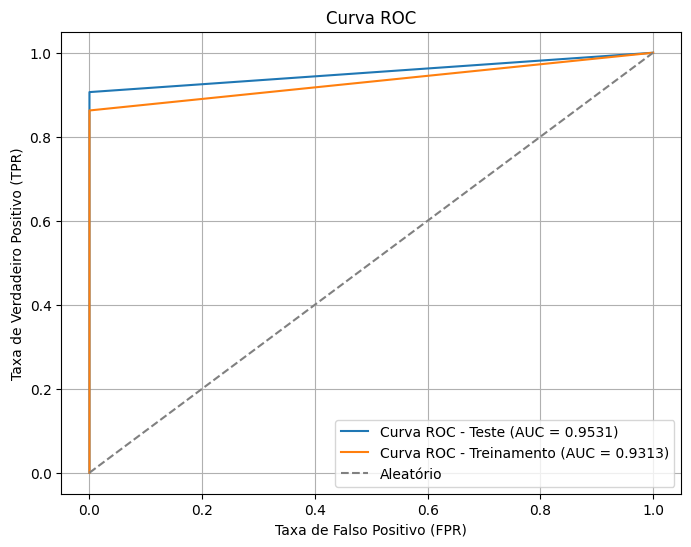

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# arquivos salvos
y_pred_test = np.load("y_pred_test.npy")
y_pred_train = np.load("y_pred_train.npy")
y_test = np.load("y_test.npy")
y_train = np.load("y_train.npy")

nan = np.isnan(y_train)
nao_nan = ~nan

# área sob a curva ROC
roc_auc_test = roc_auc_score(y_test, y_pred_test)
roc_auc_train = roc_auc_score(y_train[nao_nan], y_pred_train[nao_nan])

# valores para a curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
fpr_train, tpr_train, _ = roc_curve(y_train[nao_nan], y_pred_train[nao_nan])

# Curva Roc
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label='Curva ROC - Teste (AUC = {:.4f})'.format(roc_auc_test))
plt.plot(fpr_train, tpr_train, label='Curva ROC - Treinamento (AUC = {:.4f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
 %%time
train_score = estimator.score(X_train, np.nan_to_num(y_train, nan=-1)) 
test_score = estimator.score(X_test, y_test)

CPU times: user 258 ms, sys: 0 ns, total: 258 ms
Wall time: 262 ms


In [ ]:
#testes que foram feitos

self_train_opt.cv_results_

{'mean_fit_time': array([2.11711613e+00, 3.38690612e+01, 4.31231864e+00, 1.42438470e+02,
        3.75810385e+00, 7.14301337e+01, 8.66709185e+00, 1.06078434e+01,
        3.66776387e+00, 3.82260505e+00, 8.75503268e+01, 3.80961323e+00,
        1.05201972e+01, 7.85440922e-01, 1.08269889e+01, 1.91203343e+01,
        1.41414868e+02, 4.97736144e+00, 2.27553502e+01, 4.13257055e+01,
        1.44389216e+00, 3.26830411e+00, 8.75404471e+01, 1.21993943e+02,
        9.06918224e+01, 1.09561662e+02, 1.31591002e-01, 1.79227849e+01,
        4.30428505e-01, 1.17936434e+01, 3.81109126e+00, 7.65970788e+01,
        1.71227838e+01, 3.12208811e-01, 1.04504234e+01, 8.27865175e+01,
        6.88081226e+01, 6.14897521e+00, 8.36385552e+01, 8.20777472e+00,
        1.51977103e+01, 1.21132864e+01, 1.60325208e+01, 1.34024910e+02,
        3.54999235e+01, 6.43681886e+01, 1.82236060e+01, 7.18760830e+01,
        4.75949049e-01, 1.21659474e+01, 1.69820508e+01, 6.78203917e+01,
        2.86459327e+00, 6.45903164e+01, 2.64955

In [ ]:
# para ver o porque da diferenca entre acuracia e curva roc

# calculando as métricas no conjunto de teste (y)
acuracia = accuracy_score(y_test, y_pred_test)
precisao = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print("Métricas no conjunto de teste:")
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Recall:", recall)

Métricas no conjunto de teste:
Acurácia: 0.9142857142857143
Precisão: 1.0
Recall: 0.90625


In [ ]:
# para visualizar as variáveis que tiveram mais impacto no modelo de Random Forest

# import matplotlib.pyplot as plt

# obtendo as variaveis mais importantes
importances = estimator.named_steps['classifier'].base_estimator_.feature_importances_

np.save("importances", importances)

# plt.figure(figsize=(10, 6))
# plt.bar(feature_names, importances)
# plt.xticks(rotation=90)
# plt.xlabel("Variáveis")
# plt.ylabel("Importância")
# plt.title("Importância das variáveis no modelo de Random Forest")
# plt.show()

In [ ]:
# joblib.dump(self_train_opt.best_estimator_, 'RF_best_estimator.joblib')

In [ ]:
# salvando os melhores parametros

self_train_opt.best_params_
str_best_params_ = str(self_train_opt.best_params_)
with open("best_params_.txt", "w") as fp : 
    fp.write(str_best_params_)

In [ ]:
#testes que foram feitos

self_train_opt.cv_results_
str_cv_results = str(self_train_opt.cv_results_)
with open("cv_results.txt", "w") as fp : 
    fp.write(str_cv_results)

In [ ]:
a = estimator.named_steps['dimension_reduction']
a

NameError: name 'estimator' is not defined

In [ ]:
a.get_feature_names_out()

array(['x16', 'x17', 'x18', 'x20', 'x22', 'x42', 'x43', 'x148', 'x149',
       'x176'], dtype=object)

In [ ]:
importances

array([0.23842798, 0.30651089, 0.        , 0.        , 0.01139881,
       0.13180807, 0.16869928, 0.        , 0.        , 0.14315497])

In [ ]:
np.save('kbest_features', a.get_feature_names_out())

In [ ]:
df_out = clone(column_categoric).fit_transform(X_train)
df_out[:5]

array([[0.000000e+00, 1.000000e+00, 1.000000e+00, ..., 2.624651e+04,
        3.012550e+04, 2.585400e+04],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 1.607164e+04,
        1.596241e+04, 1.746059e+04],
       [0.000000e+00, 1.000000e+00, 1.000000e+00, ..., 5.994001e+04,
        6.696212e+04, 6.394564e+04],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 2.078118e+04,
        2.023666e+04, 2.327982e+04],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 2.684259e+04,
        2.540611e+04, 3.337694e+04]])

In [ ]:
np.save('data_out_column_categoric', df_out)

In [ ]:
# np.save = importances, kbest_features ( ler com np load)
# select k best e random forest pra ver quais variaveis mais impactaram 
1-  relacionar df_out com x train pra ver one hot converteu
2-  relacionar kbest_features e ver oq é cada um desses X q o kbest selecionou

In [ ]:
# carregando os arquivos salvos

importances = np.load('importances.npy', allow_pickle=True)
kbest_features = np.load('kbest_features.npy', allow_pickle=True)
df_out = np.load('data_out_column_categoric.npy', allow_pickle=True)

In [ ]:
# relacionando df_out com x_train
# contém os dados transformados após a codificação one-hot

df_out = pd.DataFrame(X_train, columns=df_merged.columns)
print(df_out.head())

                                           EXECUTIVO                         \
                                                2019                          
                          total_despesas_com_pessoal rcl_acumulado aplicado   
SANTO ANTONIO DO LEVERGER                28969914.34   51669680.35    56.07   
CARLINDA                                 12857969.76   29298018.73    43.89   
TAPURAH                                  28049220.49   55092131.41    50.91   
CURVELANDIA                               7373710.01   15762335.10    46.78   
PLANALTO DA SERRA                         7954032.15   17523123.06    45.39   

                                                 LEGISLATIVO                \
                                                        2019                 
                          limite_legal alerta_90    despesas rcl_acumulado   
SANTO ANTONIO DO LEVERGER         54.0       SIM  1581775.41   51669680.35   
CARLINDA                          54.0       NÃO   6769

In [ ]:
# colunas que o select k best selecionou e sua importancia

feature_importances = dict(zip(kbest_features, importances))
feature_importances

{'x16': 0.2384279794132314,
 'x17': 0.30651088592188025,
 'x18': 0.0,
 'x20': 0.0,
 'x22': 0.011398814726882908,
 'x42': 0.13180806761345445,
 'x43': 0.16869928165185205,
 'x148': 0.0,
 'x149': 0.0,
 'x176': 0.1431549706726989}

In [ ]:
# ver o que é cada um desses x para ver quais variaveis mais impactaram

importance_scores = sorted(zip(df_merged.columns, importances))
importance_scores

[(('EXECUTIVO', '2019', 'alerta_90'), 0.011398814726882908),
 (('EXECUTIVO', '2019', 'aplicado'), 0.0),
 (('EXECUTIVO', '2019', 'limite_legal'), 0.0),
 (('EXECUTIVO', '2019', 'rcl_acumulado'), 0.30651088592188025),
 (('EXECUTIVO', '2019', 'total_despesas_com_pessoal'), 0.2384279794132314),
 (('LEGISLATIVO', '2019', 'alerta_90'), 0.1431549706726989),
 (('LEGISLATIVO', '2019', 'aplicado'), 0.0),
 (('LEGISLATIVO', '2019', 'despesas'), 0.13180806761345445),
 (('LEGISLATIVO', '2019', 'limite_legal'), 0.0),
 (('LEGISLATIVO', '2019', 'rcl_acumulado'), 0.16869928165185205)]

In [ ]:
X_train.head()

EXECUTIVO                         \
                                                2019                          
                          total_despesas_com_pessoal rcl_acumulado aplicado   
SANTO ANTONIO DO LEVERGER                28969914.34   51669680.35    56.07   
CARLINDA                                 12857969.76   29298018.73    43.89   
TAPURAH                                  28049220.49   55092131.41    50.91   
CURVELANDIA                               7373710.01   15762335.10    46.78   
PLANALTO DA SERRA                         7954032.15   17523123.06    45.39   

                                                 LEGISLATIVO                \
                                                        2019                 
                          limite_legal alerta_90    despesas rcl_acumulado   
SANTO ANTONIO DO LEVERGER         54.0       SIM  1581775.41   51669680.35   
CARLINDA                          54.0       NÃO   676982.57   29298018.73   
TAPURAH                           54.0       SIM  1284772.92   55092131.41   
CURVELANDIA                       54.0       NÃO   373932.71   15762335.10   
PLANALTO DA SERRA                 54.0       NÃO   515023.22   17523123.06   

                                                           ...  \
                                                           ...   
                          aplicado limite_legal alerta_90  ...   
SANTO ANTONIO DO LEVERGER     3.06          6.0       NÃO  ...   
CARLINDA                      2.31          6.0       NÃO  ...   
TAPURAH                       2.33          6.0       NÃO  ...   
CURVELANDIA                   2.37          6.0       NÃO  ...   
PLANALTO DA SERRA             2.94          6.0       NÃO  ...   

                                                                             ibge  \
                                                                             2020   
                          IDEB – Anos finais do ensino fundamental (Rede pública)   
SANTO ANTONIO DO LEVERGER                                               43.0        
CARLINDA                                                                45.0        
TAPURAH                                                                  5.0        
CURVELANDIA                                                              5.0        
PLANALTO DA SERRA                                                        NaN        

                                                       \
                                                        
                          Área da unidade territorial   
SANTO ANTONIO DO LEVERGER                    9469.139   
CARLINDA                                     2421.788   
TAPURAH                                      4492.539   
CURVELANDIA                                   357.128   
PLANALTO DA SERRA                            2437.590   

                                                      \
                                                       
                                         Mesorregião   
SANTO ANTONIO DO LEVERGER  Centro-Sul Mato-grossense   
CARLINDA                        Norte Mato-grossense   
TAPURAH                         Norte Mato-grossense   
CURVELANDIA                Centro-Sul Mato-grossense   
PLANALTO DA SERRA               Norte Mato-grossense   

                                                                                     \
                                                                               2017   
                          IDEB – Anos iniciais do ensino fundamental (Rede pública)   
SANTO ANTONIO DO LEVERGER                                                5.3          
CARLINDA                                                                 5.5          
TAPURAH                                                                  5.9          
CURVELANDIA                                                              6.0          
PLANALTO DA SERRA                                           

In [ ]:
clone_column_categoric = clone(column_categoric)

out_column_transform = clone_column_categoric.fit_transform(X_train)
out_column_transform

array([[0.000000e+00, 1.000000e+00, 1.000000e+00, ..., 2.624651e+04,
        3.012550e+04, 2.585400e+04],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 1.607164e+04,
        1.596241e+04, 1.746059e+04],
       [0.000000e+00, 1.000000e+00, 1.000000e+00, ..., 5.994001e+04,
        6.696212e+04, 6.394564e+04],
       ...,
       [0.000000e+00, 1.000000e+00, 1.000000e+00, ..., 3.519883e+04,
        3.434468e+04, 3.473424e+04],
       [0.000000e+00, 1.000000e+00, 1.000000e+00, ..., 9.457487e+04,
        8.464544e+04, 7.909065e+04],
       [0.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.982753e+04,
        2.004759e+04, 1.999342e+04]])

In [ ]:
features_name = clone_column_categoric.get_feature_names_out(input_features=['__'.join(x) for x in X_train.columns])
features_name

array(['category__EXECUTIVO__2019__alerta_90_NÃO',
       'category__EXECUTIVO__2019__alerta_90_SIM',
       'category__LEGISLATIVO__2019__alerta_90_NÃO',
       'category__EXECUTIVO__2021__alerta_90_NÃO',
       'category__EXECUTIVO__2021__alerta_90_SIM',
       'category__LEGISLATIVO__2021__alerta_90_NÃO',
       'category__EXECUTIVO__2020__alerta_90_NÃO',
       'category__EXECUTIVO__2020__alerta_90_SIM',
       'category__EXECUTIVO__2020__alerta_90_nan',
       'category__LEGISLATIVO__2020__alerta_90_NÃO',
       'category__LEGISLATIVO__2020__alerta_90_nan',
       'category__EXECUTIVO__2017__alerta_90_NÃO',
       'category__EXECUTIVO__2017__alerta_90_SIM',
       'category__EXECUTIVO__2017__alerta_90_nan',
       'category__LEGISLATIVO__2017__alerta_90_NÃO',
       'category__LEGISLATIVO__2017__alerta_90_nan',
       'category__EXECUTIVO__2022__alerta_90_NÃO',
       'category__EXECUTIVO__2022__alerta_90_SIM',
       'category__EXECUTIVO__2022__alerta_90_nan',
       'category__L

In [ ]:
feature_dict = {
    f'x{i}': y for i, y in enumerate(features_name)
}
feature_dict

{'x0': 'category__EXECUTIVO__2019__alerta_90_NÃO',
 'x1': 'category__EXECUTIVO__2019__alerta_90_SIM',
 'x2': 'category__LEGISLATIVO__2019__alerta_90_NÃO',
 'x3': 'category__EXECUTIVO__2021__alerta_90_NÃO',
 'x4': 'category__EXECUTIVO__2021__alerta_90_SIM',
 'x5': 'category__LEGISLATIVO__2021__alerta_90_NÃO',
 'x6': 'category__EXECUTIVO__2020__alerta_90_NÃO',
 'x7': 'category__EXECUTIVO__2020__alerta_90_SIM',
 'x8': 'category__EXECUTIVO__2020__alerta_90_nan',
 'x9': 'category__LEGISLATIVO__2020__alerta_90_NÃO',
 'x10': 'category__LEGISLATIVO__2020__alerta_90_nan',
 'x11': 'category__EXECUTIVO__2017__alerta_90_NÃO',
 'x12': 'category__EXECUTIVO__2017__alerta_90_SIM',
 'x13': 'category__EXECUTIVO__2017__alerta_90_nan',
 'x14': 'category__LEGISLATIVO__2017__alerta_90_NÃO',
 'x15': 'category__LEGISLATIVO__2017__alerta_90_nan',
 'x16': 'category__EXECUTIVO__2022__alerta_90_NÃO',
 'x17': 'category__EXECUTIVO__2022__alerta_90_SIM',
 'x18': 'category__EXECUTIVO__2022__alerta_90_nan',
 'x19': 'c

In [ ]:
for kbest_feature, importance in zip(kbest_features, importances):
    print(feature_dict[kbest_feature], '->', importance)

category__EXECUTIVO__2022__alerta_90_NÃO -> 0.2384279794132314
category__EXECUTIVO__2022__alerta_90_SIM -> 0.30651088592188025
category__EXECUTIVO__2022__alerta_90_nan -> 0.0
category__LEGISLATIVO__2022__alerta_90_nan -> 0.0
category__EXECUTIVO__2018__alerta_90_SIM -> 0.011398814726882908
remainder__DÍVIDA__2019__total_divida -> 0.13180806761345445
remainder__DÍVIDA__2019__%_limite_maximo -> 0.16869928165185205
remainder__DÍVIDA__2022__total_divida -> 0.0
remainder__DÍVIDA__2022__%_limite_maximo -> 0.0
remainder__DÍVIDA__2018__%_limite_maximo -> 0.1431549706726989


In [ ]:
# matriz de confusao
# grafico da curva roc

In [ ]:
# fiz no colab

from diagrams import Diagram, Cluster
from diagrams.aws.ml import *
from diagrams.aws.database import RDS
from diagrams.onprem.compute import Server
from IPython.display import Image, display

with Diagram("Aplicação do Modelo", filename="arch_analytics", show=False):
    with Cluster("Pipeline"):
        col_transformer = Server("Column\nTransformer", align="CENTER")
        imputation = Server("Imputação", align="CENTER")
        normalization = Server("Normalização", align="CENTER")
        dimensionality_reduction = Server("Redução da\nDimensionalidade", align="CENTER")
        classifier = MachineLearning("Random Forest\nClassifier", align="CENTER")
        self_training = MachineLearning("Self-Training", align="CENTER")

    with Cluster("Dados de Entrada"):
        dataset = RDS("Conjunto de Dados")

    with Cluster("Busca Melhores Parametros"):
         bayes = MachineLearning("Bayes Search\nCV", align="CENTER")

    with Cluster("Dados de Saída"):
        predictions = RDS("Previsões")

    dataset >> col_transformer >> imputation >> normalization >> dimensionality_reduction >> classifier >> self_training >> bayes  >>predictions

Image('arch_analytics.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0f127466-a2d7-47bb-a0d6-64400cc3e256' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>